In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.tree import DecisionTreeRegressor

## 造数据

In [9]:
N = 400
# x = np.random.rand(N) * 100 - 4    #[-4,4)
x = np.random.rand(N) * 4 * np.pi
x.sort()
print x[:5]

[ 0.00126157  0.07627195  0.08104656  0.10586748  0.14756094]


In [10]:
y1 = 16 * np.sin(x) ** 3 + np.random.randn(N) * 0.5
y2 = 13 * np.cos(x) - 5 * np.cos(2 * x) - 2 * np.cos(3 * x) - np.cos(4 * x) \
        + np.random.randn(N) * 0.5
print y1[:5]
print y2[:5]

[-0.0099103  -0.35537073 -0.29243669 -0.19420299  0.70594384]
[ 4.38744687  5.70583444  4.94953396  5.55003168  5.5089296 ]


In [11]:
y = np.vstack((y1,y2)).T
print y.shape
print 'data =\n',np.vstack((x, y1, y2)).T.shape

(400L, 2L)
data =
(400L, 3L)


In [12]:
x = x.reshape(-1,1)

## 构建模型

In [13]:
deep = 10
reg = DecisionTreeRegressor(criterion='mse', max_depth=deep)
dt = reg.fit(x, y)

In [14]:
x_test = np.linspace(x.min(), x.max(), num=100).reshape(-1,1)
print x_test.shape

(100L, 1L)


In [15]:
y_hat = dt.predict(x_test)

## 绘图

In [16]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

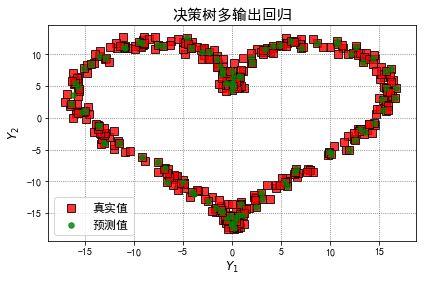

In [19]:
plt.scatter(y[:, 0], y[:, 1], c='r', marker='s', edgecolor='k', s=60, label=u'真实值', \
           alpha=0.8)
plt.scatter(y_hat[:, 0], y_hat[:, 1], c='g', marker='o', edgecolor='g', \
           s=30, label=u'预测值', alpha=0.8)
plt.legend(loc='lower left', fancybox=True, fontsize=12)
plt.xlabel('$Y_1$', fontsize=12)
plt.ylabel('$Y_2$', fontsize=12)
plt.grid(b=True, ls=':', color='#606060')
plt.title(u'决策树多输出回归', fontsize=15)
plt.tight_layout(1)
plt.show()